In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [46]:
df_day = pd.read_csv(r"C:\Users\rishy\Downloads\aiml\day.csv")
df_hour = pd.read_csv(r"C:\Users\rishy\Downloads\ml\hour.csv")

print("Files Loaded Successfully!\n")





Files Loaded Successfully!



The "Id" variable doesn't provide any meaningful information for the data; it's equivalent to the index, so we'll drop this column.

In [ ]:
def clean_data(df):

    
    df = df.drop_duplicates()

    
    df.columns = (
        df.columns.str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("[^a-z0-9_]", "", regex=True)
    )


    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

   
    for col in df.select_dtypes(include="object").columns:
        df[col] = df[col].str.lower().str.strip()

    if "dteday" in df.columns:
        df["dteday"] = pd.to_datetime(df["dteday"], errors="coerce")

    
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="ignore")

    
    df.fillna(df.mean(numeric_only=True), inplace=True)

    
    for col in df.select_dtypes(include="object").columns:
        if df[col].mode().size > 0:
            df[col] = df[col].fillna(df[col].mode()[0])

    return df






In [48]:

clean_day = clean_data(df_day)
clean_hour = clean_data(df_hour)

clean_day.to_csv("cleaned_day.csv", index=False)
clean_hour.to_csv("cleaned_hour.csv", index=False)

print("Cleaned files saved: cleaned_day.csv & cleaned_hour.csv\n")





Cleaned files saved: cleaned_day.csv & cleaned_hour.csv



C:\Users\rishy\AppData\Local\Temp\ipykernel_6064\4068027128.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
C:\Users\rishy\AppData\Local\Temp\ipykernel_6064\4068027128.py:27: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
C:\Users\rishy\AppData\Local\Temp\ipykernel_6064\4068027128.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
C:\Users\rishy\AppData\Local\Temp\ipykernel_6064\4068027128.py:27: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


In [ ]:
def eda_summary(df, name="dataset"):
    print("=" * 60)
    print("EDA SUMMARY FOR:", name.upper())
    print("=" * 60)

    print("\nShape:", df.shape)
    print("\nColumns:", df.columns.tolist())
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nDuplicate Rows:", df.duplicated().sum())
    print("\nData Types:\n", df.dtypes)

    print("\nStatistical Summary:")
    print(df.describe(include='all').T)

  
    plt.figure(figsize=(6, 3))
    df.isnull().sum().plot(kind='bar')
    plt.title(f"Missing Values in {name}")
    plt.tight_layout()
    plt.show()

   
    plt.figure(figsize=(8, 5))
    sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
    plt.title(f"Correlation Heatmap - {name}")
    plt.tight_layout()
    plt.show()

 
    if "cnt" in df.columns:
        plt.figure(figsize=(6, 3))
        sns.histplot(df["cnt"], kde=True)
        plt.title(f"{name} - Distribution of cnt")
        plt.tight_layout()
        plt.show()





EDA SUMMARY FOR: DAY DATASET

Shape: (731, 16)

Columns: ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

Missing Values:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Duplicate Rows: 0

Data Types:
 instant         int64
dteday          int64
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Statistical Summary:
            count          mean           std           min           2

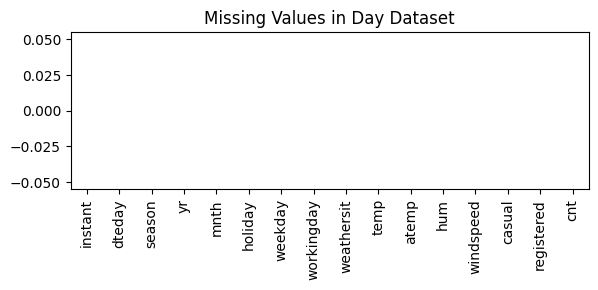

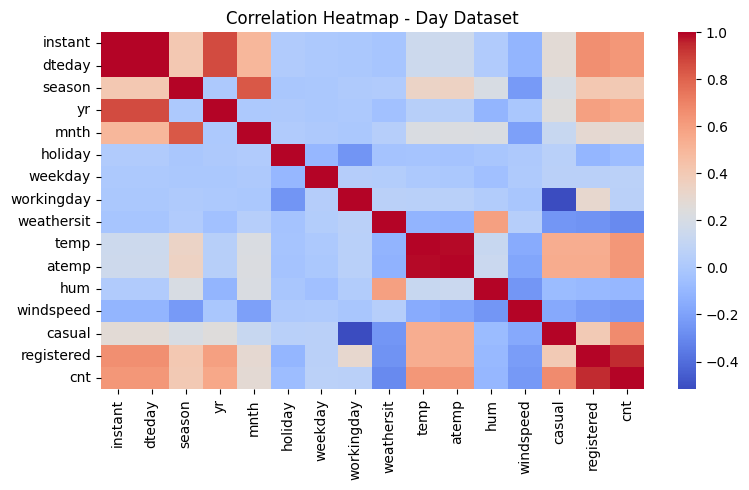

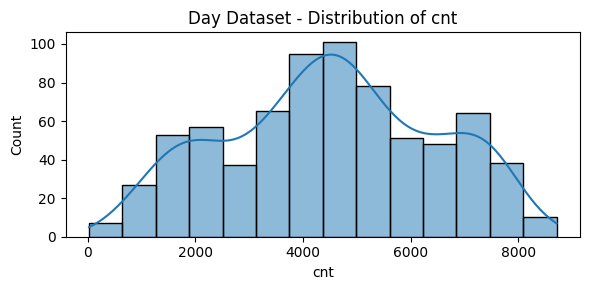

EDA SUMMARY FOR: HOUR DATASET

Shape: (17379, 17)

Columns: ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

Missing Values:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Duplicate Rows: 0

Data Types:
 instant         int64
dteday          int64
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Statistical Summary:
              count     

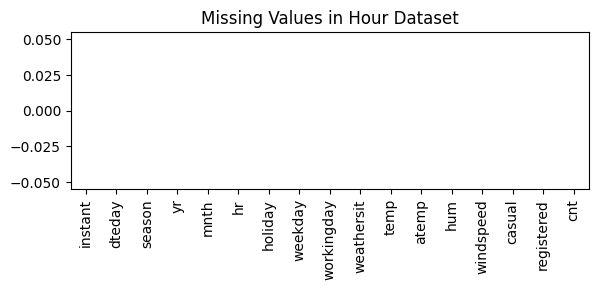

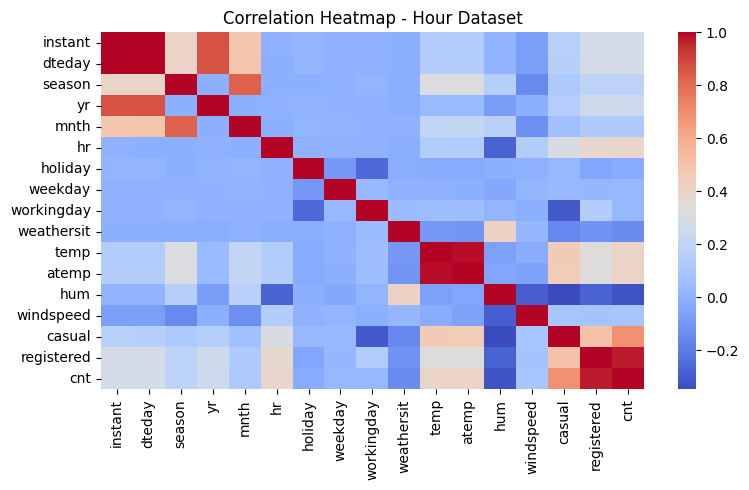

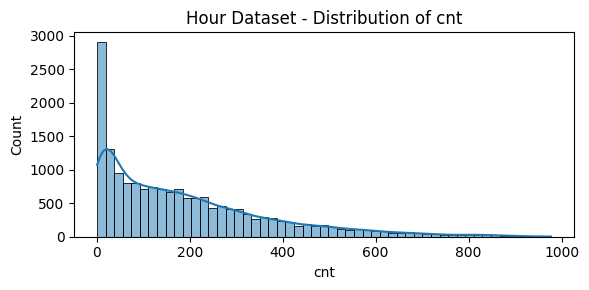


EDA Completed Successfully!


In [55]:

eda_summary(clean_day, "Day Dataset")
eda_summary(clean_hour, "Hour Dataset")

print("\nEDA Completed Successfully!")